# CAMELS BR (Catchment Attributes and Meteorology for Large-Sample Studies)


### 📊 Entendendo o dataset

O **CAMELS-BR** (Catchment Attributes and Meteorology for Large-Sample Studies – Brazil) é um grande conjunto de **dados hidrometeorológicos** que reúne informações diárias de clima, vazão e características físicas de aproximadamente _897 bacias hidrográficas brasileiras_, com o objetivo de facilitar estudos em recursos hídricos e modelagem hidrológica.

---

### 🧩 Principais componentes

- 📅 **Período**: dados diários entre 1980 e 2020 (varia conforme a bacia).
- 🌎 **Unidade de análise**: bacias hidrográficas (_não_ municípios ou estados).
- 🗂️ **Formato**: cada variável é armazenada em arquivos `.txt` individuais, um por bacia.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### **1. Vazão em metros cúbicos por segundo (streamflow)**

In [3]:
import os # para trablhar com caminhos de pastas dentro do jupyter

In [23]:
pasta_streamflow = r'C:\Users\AUGUSTO\Desktop\PROJETO CAMELS\2_CAMELS_BR_streamflow_m3s'  # Caminho da pasta dos arquivos
todos_dfs = []  # Lista para armazenar os DataFrames temporários

# Percorrer todos os arquivos na pasta
for nome_arquivo in os.listdir(pasta_streamflow):
    if nome_arquivo.endswith('.txt'):
        caminho = os.path.join(pasta_streamflow, nome_arquivo)  # Criar o caminho completo do arquivo
        bacia_id = nome_arquivo.replace('_streamflow_m3s.txt', '')  # Extrair o ID da bacia pelo nome do arquivo

        # Carregar o arquivo .txt
        df_temp = pd.read_csv(
            caminho,
            sep=r'\s+',
            header=0,  # usar o cabeçalho
            names=['year', 'month', 'day', 'streamflow_m3s', 'qual_control_by_ana', 'qual_flag']
        )

        # Transformar as colunas year, month, day em uma coluna datetime
        df_temp['date'] = pd.to_datetime(df_temp[['year', 'month', 'day']])

        # Criar a coluna bacia_id com o identificador extraído
        df_temp['bacia_id'] = bacia_id

        # Selecionar somente as colunas importantes para análise
        df_temp = df_temp[['date', 'bacia_id', 'streamflow_m3s']]

        # Adicionar o DataFrame temporário à lista
        todos_dfs.append(df_temp)

# Após ler todos os arquivos, concatenar todos os DataFrames em um só
df_vazao = pd.concat(todos_dfs, ignore_index=True)

In [24]:
print(f"Número de bacias únicas no dataset: {df_vazao['bacia_id'].nunique()}") # Exibir bacias únicas

Número de bacias únicas no dataset: 3713


In [25]:
df_vazao.head(15)

,date,bacia_id,streamflow_m3s
0,1986-02-01,10064000,NaN
1,1986-02-02,10064000,4809.0
2,1986-02-03,10064000,4114.0
3,1986-02-04,10064000,4311.0
4,1986-02-05,10064000,4520.0
5,1986-02-06,10064000,3865.0
6,1986-02-07,10064000,3191.0
7,1986-02-08,10064000,3149.0
8,1986-02-09,10064000,2525.0
9,1986-02-10,10064000,2255.0


# 🌊 Análise da Vazão nas Bacias Hidrográficas — Seleção das Top 10 🏞️

O dataset contém dados de vazão para **3.713 bacias hidrográficas** diferentes. Embora essa quantidade represente uma base rica para análise, plotar todas as bacias juntas é inviável por vários motivos:

- 📉 **Complexidade visual:** Gráficos com milhares de linhas ficam poluídos e difíceis de interpretar.
- 🖥️ **Desempenho computacional:** Processar tantas séries temporais pode causar lentidão ou travamentos.
- 🎯 **Foco analítico:** Analisar tantas bacias ao mesmo tempo dificulta extrair insights relevantes.

Por isso, selecionaremos as **10 bacias com maior quantidade de dados disponíveis** (top 10), garantindo maior completude e representatividade temporal.

Assim, a análise ficará mais clara, eficiente e permitirá um entendimento mais aprofundado da dinâmica da vazão nas principais bacias.

---


In [28]:
# Contar quantos registros cada bacia tem
contagem_bacias = df_vazao['bacia_id'].value_counts()

In [29]:
print(contagem_bacias.head(10)) # Pegar as 10 primeiras, consequentemente, as com mais dados de vazão

bacia_id
68100000    43250
37080000    39506
37440000    35705
38440000    35582
58630002    35156
58204000    35125
58974000    34881
58880001    34790
64843000    34547
44200000    34456
Name: count, dtype: int64


In [30]:
# Selecionando as top 10 bacias

top_10_bacias = contagem_bacias.head(10).index.tolist()

In [31]:
print("Top 10 bacias:", top_10_bacias)

Top 10 bacias: ['68100000', '37080000', '37440000', '38440000', '58630002', '58204000', '58974000', '58880001', '64843000', '44200000']


In [33]:
# Filtrando um dataset apenas para essas bacias

df_top10 = df_vazao[df_vazao['bacia_id'].isin(top_10_bacias)]

In [35]:
df_top10.head(10)

,date,bacia_id,streamflow_m3s
6979580,1911-01-01,37080000,0.0
6979581,1911-01-02,37080000,NaN
6979582,1911-01-03,37080000,NaN
6979583,1911-01-04,37080000,NaN
6979584,1911-01-05,37080000,NaN
6979585,1911-01-06,37080000,NaN
6979586,1911-01-07,37080000,NaN
6979587,1911-01-08,37080000,NaN
6979588,1911-01-09,37080000,NaN
6979589,1911-01-10,37080000,NaN


In [36]:
# Como vimos, não tratamos anteriormente os valores Nan, o que trouxe um problema. Vamos agrupar por bacias novamente, agora apenas com valores válidos.

# Agrupar por bacia e contar apenas os valores válidos de vazão
top_bacias_validas = df_vazao.dropna(subset=['streamflow_m3s']) \
    .groupby('bacia_id') \
    .size() \
    .sort_values(ascending=False) \
    .head(10)

print(top_bacias_validas)
top_10_bacias = top_bacias_validas.index.tolist()
df_top10 = df_vazao[df_vazao['bacia_id'].isin(top_10_bacias)]


bacia_id
68100000    41327
58630002    35115
58204000    35067
58974000    34783
44200000    34456
64843000    34395
58183000    33843
58535000    33784
56610000    33737
58920000    32934
dtype: int64


In [37]:
df_top10.head(10)

,date,bacia_id,streamflow_m3s
11080479,1924-10-01,44200000,809.120
11080480,1924-10-02,44200000,787.543
11080481,1924-10-03,44200000,776.835
11080482,1924-10-04,44200000,771.501
11080483,1924-10-05,44200000,766.181
11080484,1924-10-06,44200000,755.583
11080485,1924-10-07,44200000,745.038
11080486,1924-10-08,44200000,745.038
11080487,1924-10-09,44200000,734.549
11080488,1924-10-10,44200000,755.583


### 1. Gráfico de linha (Vazão x tempo)

In [46]:
# Carregar localização das bacias
df_location = pd.read_csv(r'C:\Users\AUGUSTO\Desktop\PROJETO CAMELS\1_CAMELS_BR_attributes\camels_br_location.txt', sep=r'\s+')

# Selecionar as top 3 bacias do seu dataset de vazão
top_3_bacias = top_10_bacias[:3]

# Filtrar as localizações dessas bacias
df_top3_location = df_location[df_location['gauge_id'].isin(top_3_bacias)]

print(df_top3_location)

Empty DataFrame
Columns: [gauge_id, gauge_name, gauge_region, gauge_lat, gauge_lon]
Index: []


In [47]:
print(df_top10['bacia_id'].dtype)
print(df_location['gauge_id'].dtype)


object
int64


In [54]:
df_location['gauge_id'] = df_location['gauge_id'].astype(str) # tipos diferentes. converter para o mesmo


In [62]:
df_top3 = df_top10.merge(df_location, left_on='bacia_id', right_on='gauge_id', how='left')
print(df_top3[['bacia_id', 'gauge_id', 'gauge_name']].drop_duplicates())


        bacia_id  gauge_id                gauge_name
0       44200000  44200000             sao_francisco
34456   56610000  56610000            rio_piracicaba
68514   58183000  58183000           pindamonhangaba
102390  58204000  58204000             guaratingueta
137515  58535000  58535000                   zelinda
171697  58630002  58630002                      anta
206853  58920000  58920000      patrocinio_do_muriae
239787  58974000  58974000  campos_-_ponte_municipal
274668  64843000  64843000              guaira_porto
309215  68100000  68100000     corrientes_(408-mosp)


C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\3628733227.py:35: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\3628733227.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


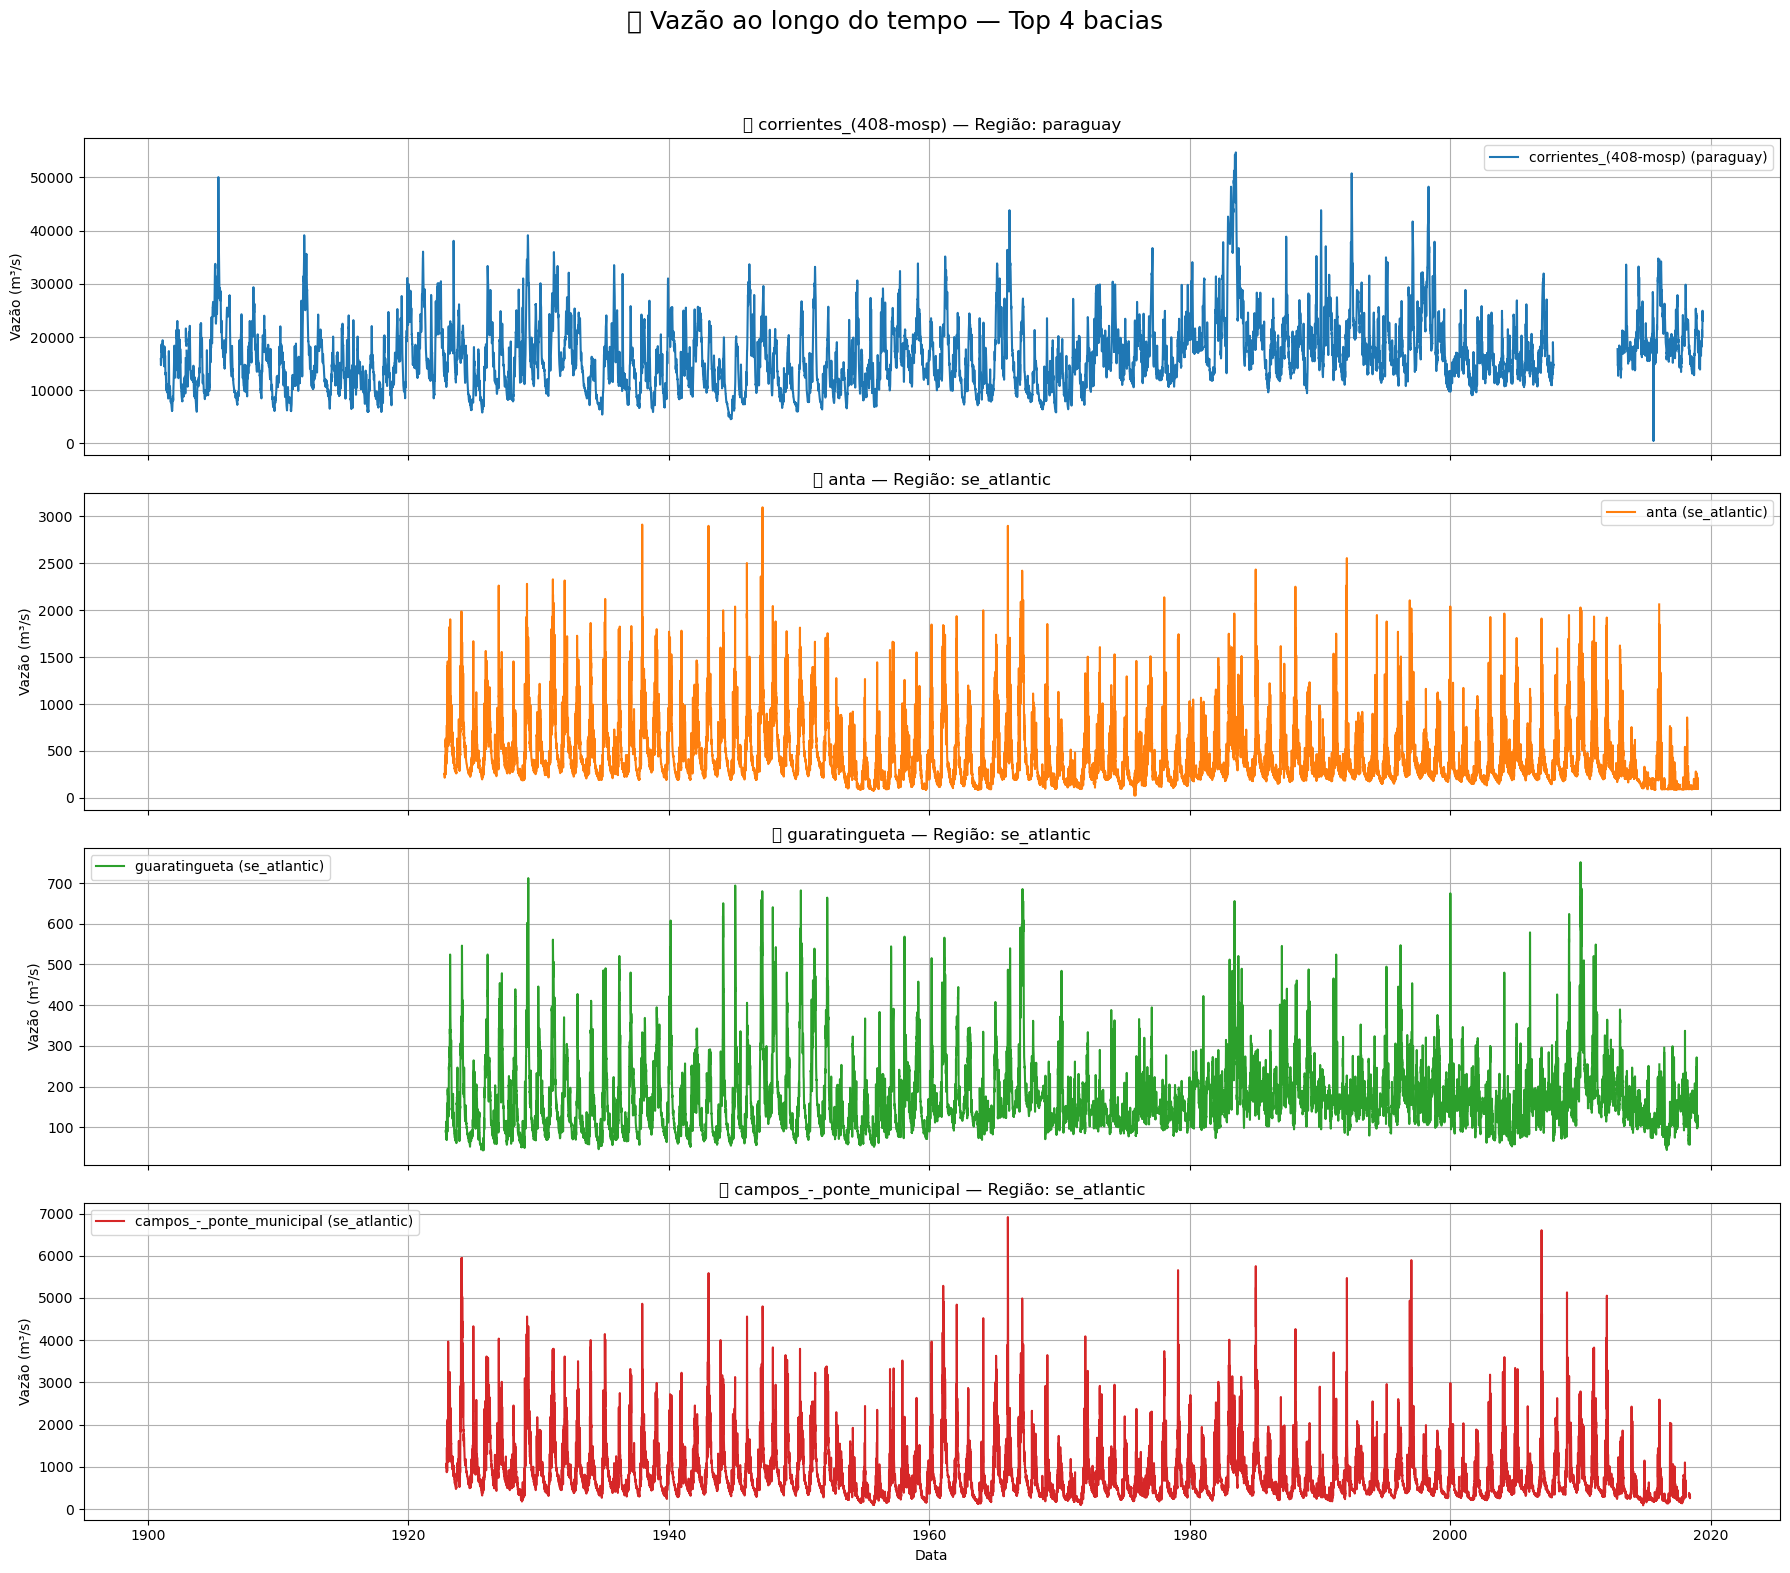

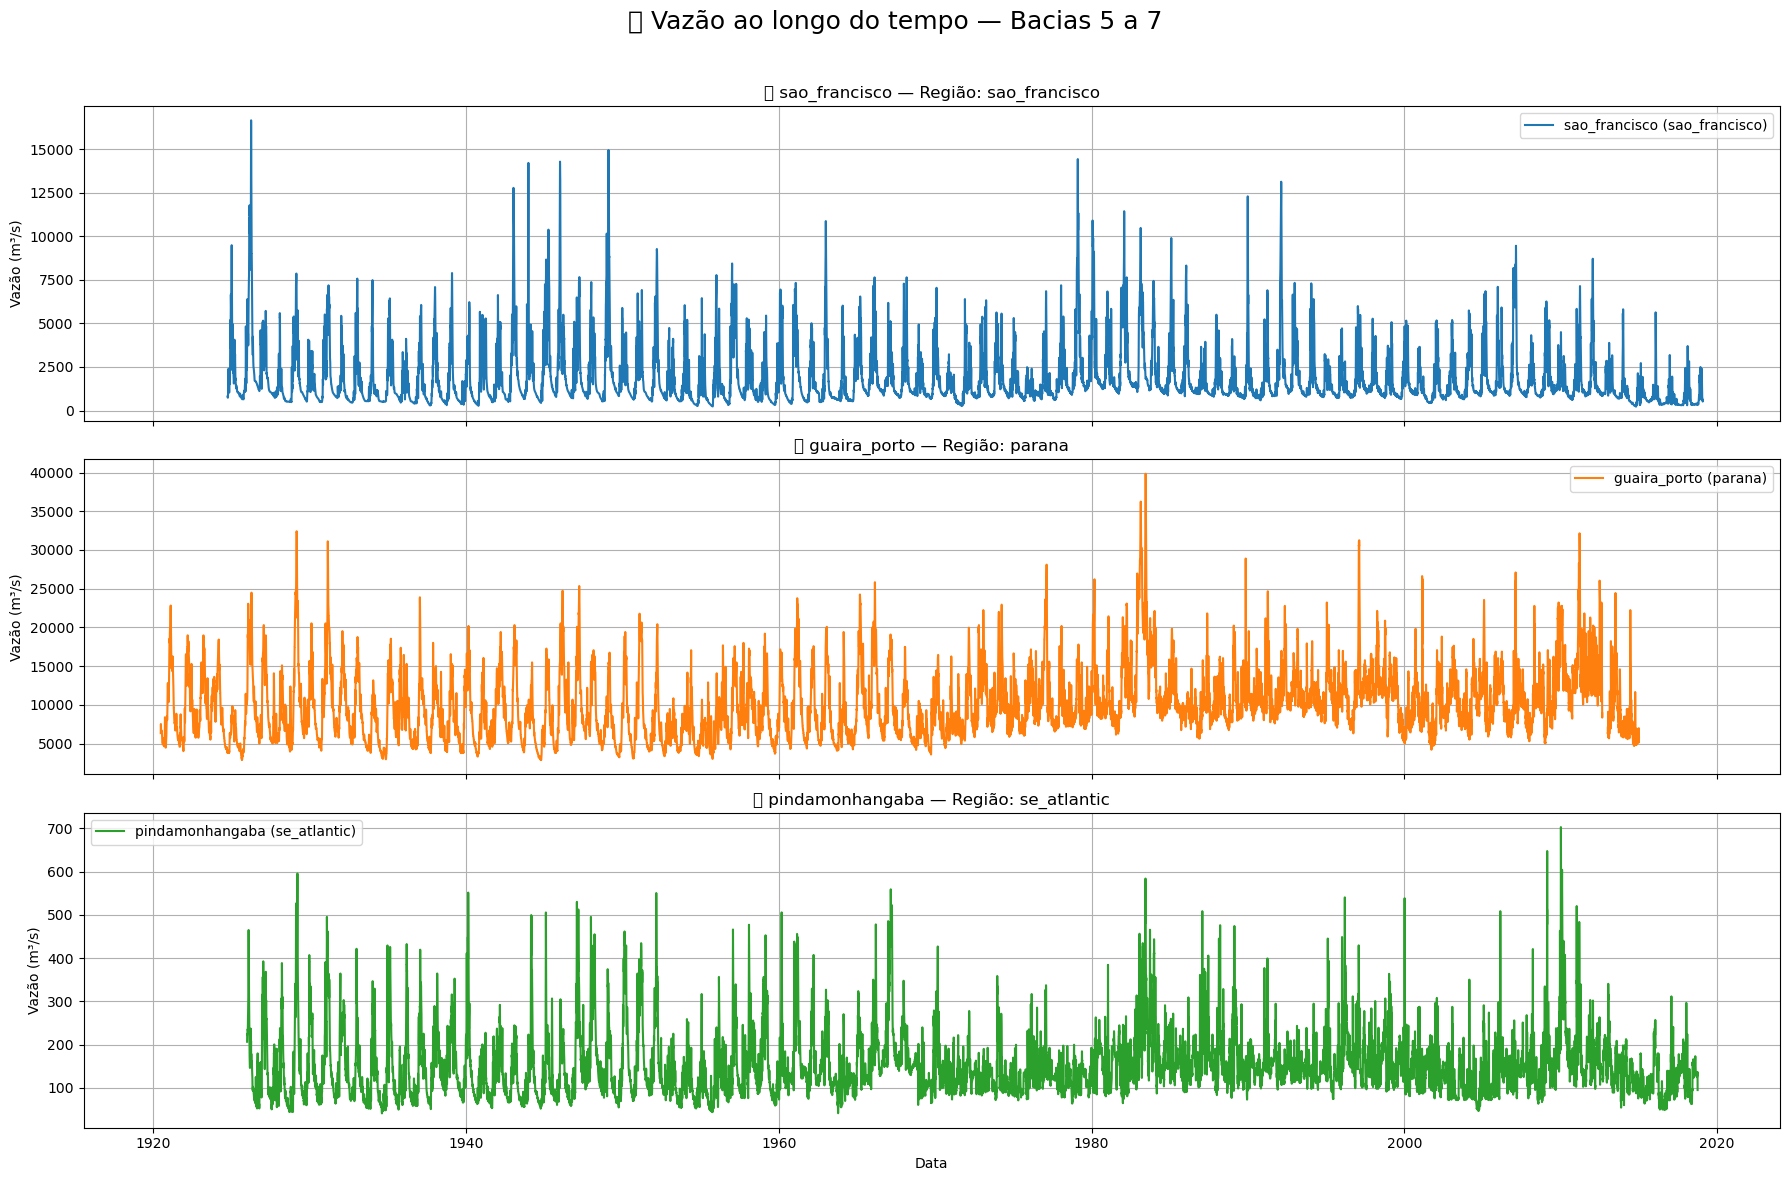

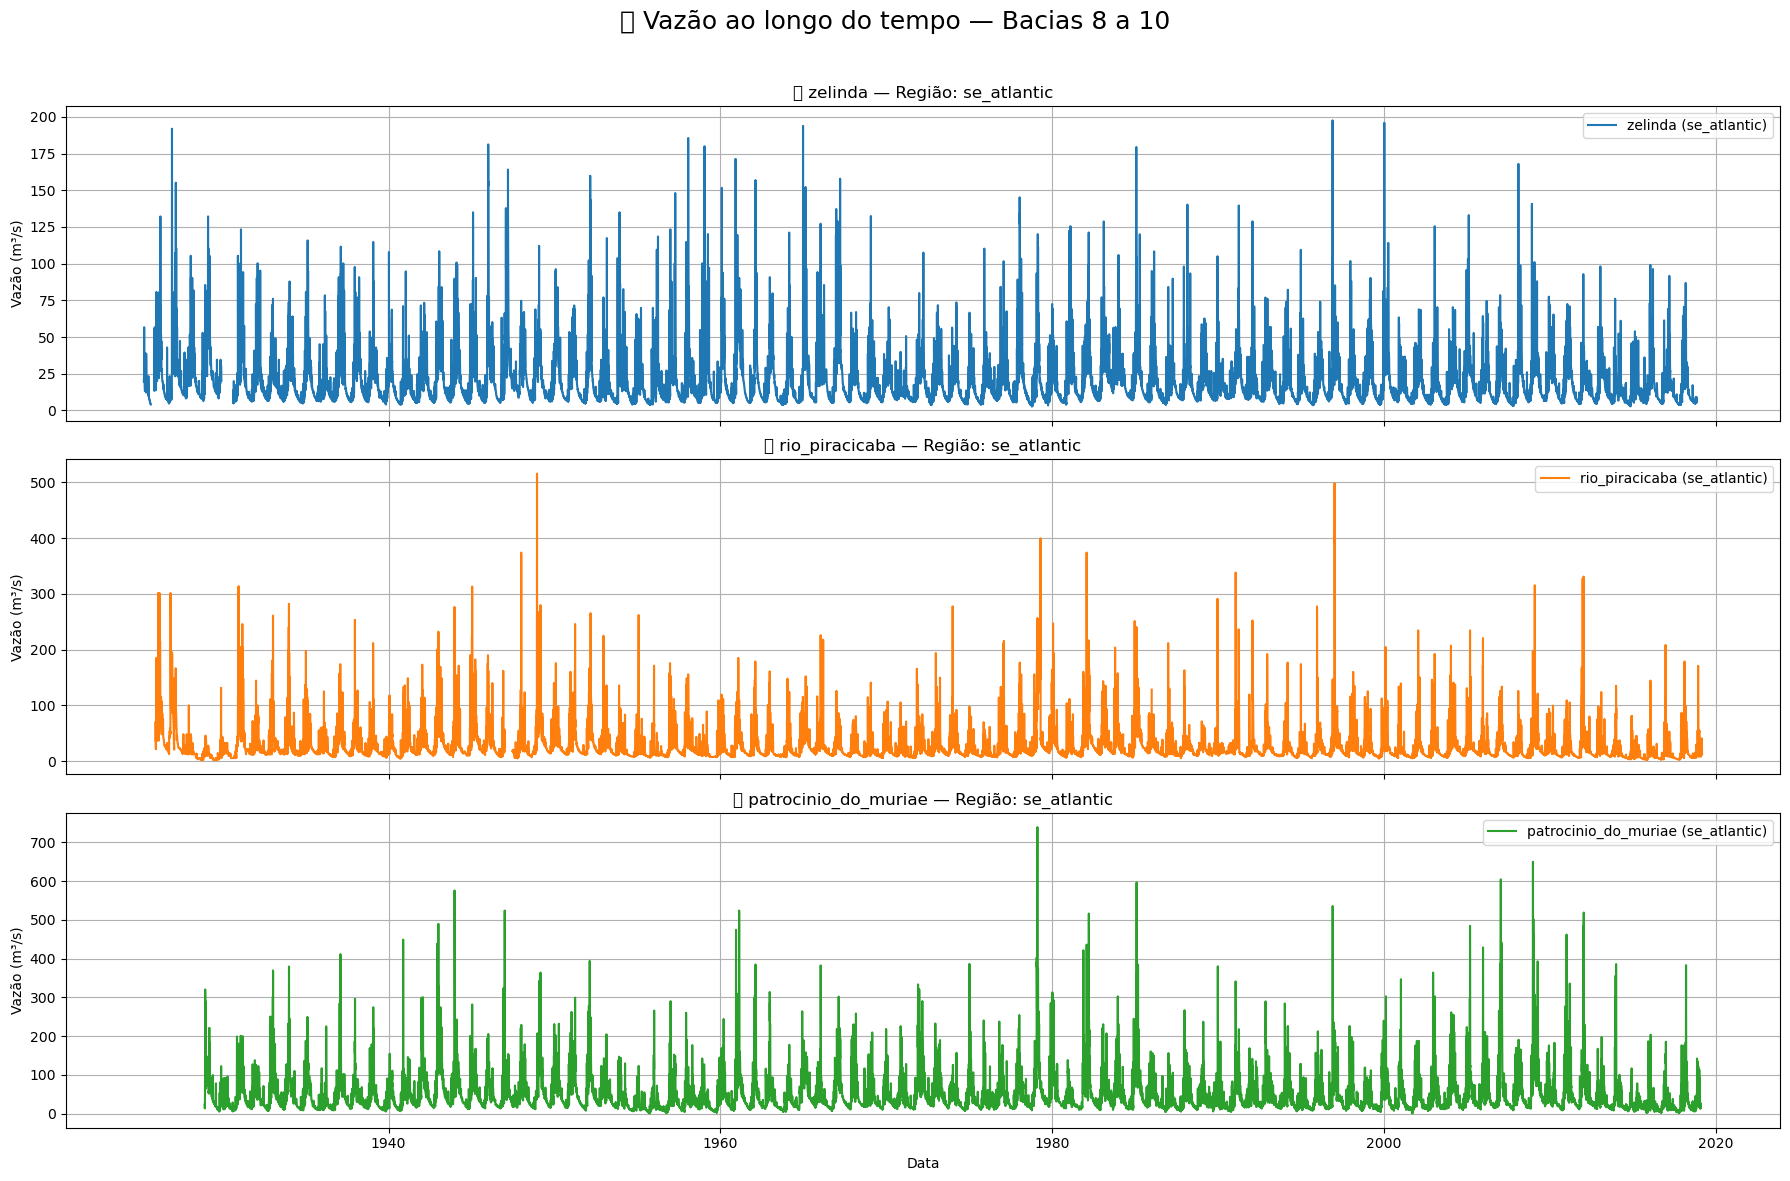

In [63]:
# Top 10 bacias
top_10_bacias = top_10_bacias[:10]  # garantir que seja só 10

# Converter gauge_id para string para garantir o merge
df_location['gauge_id'] = df_location['gauge_id'].astype(str)

# Filtrar e fazer merge para pegar info das 10 bacias
df_top10 = df_top10[df_top10['bacia_id'].isin(top_10_bacias)]
df_top10 = df_top10.merge(df_location, left_on='bacia_id', right_on='gauge_id', how='left')

# Função para plotar subplots dado um slice da lista de bacias
def plot_subplots(bacias, nrows, ncols, fig_title):
    colors = plt.cm.tab10.colors  # paleta de 10 cores
    fig, axs = plt.subplots(nrows, ncols, figsize=(18, 4 * nrows), sharex=True)
    axs = axs.flatten()  # facilitar o loop

    for i, bacia in enumerate(bacias):
        df_bacia = df_top10[df_top10['bacia_id'] == bacia]
        nome = df_bacia['gauge_name'].iloc[0]
        regiao = df_bacia['gauge_region'].iloc[0]

        axs[i].plot(df_bacia['date'], df_bacia['streamflow_m3s'], color=colors[i], linewidth=1.5,
                    label=f'{nome} ({regiao})')
        axs[i].set_title(f'🟦 {nome} — Região: {regiao}')
        axs[i].set_ylabel('Vazão (m³/s)')
        axs[i].legend()
        axs[i].grid(True)

    # Esconder subplots extras (quando tiver menos gráficos que axs)
    for j in range(len(bacias), len(axs)):
        fig.delaxes(axs[j])

    axs[-1].set_xlabel('Data')
    plt.suptitle(fig_title, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


# 1ª figura: top 4
plot_subplots(top_10_bacias[:4], nrows=4, ncols=1, fig_title='📊 Vazão ao longo do tempo — Top 4 bacias')

# 2ª figura: próximas 3
plot_subplots(top_10_bacias[4:7], nrows=3, ncols=1, fig_title='📊 Vazão ao longo do tempo — Bacias 5 a 7')

# 3ª figura: últimas 3
plot_subplots(top_10_bacias[7:10], nrows=3, ncols=1, fig_title='📊 Vazão ao longo do tempo — Bacias 8 a 10')


# Análise geral para a Bacia do Rio São francisco

# 🌊 Análise da Bacia do Rio São Francisco

## 📌 Introdução

A Bacia Hidrográfica do Rio São Francisco é uma das mais importantes do Brasil, abrangendo uma área de aproximadamente **640.000 km²**, que percorre os estados de Minas Gerais, Bahia, Pernambuco, Alagoas, Sergipe e parte do Distrito Federal. Conhecido como "o rio da integração nacional", o São Francisco é fundamental para o abastecimento humano, agricultura, geração de energia e navegação.

A análise desta bacia é essencial para entender a dinâmica hídrica da região, identificar padrões de precipitação e vazão, e apoiar a gestão sustentável dos recursos hídricos.

---

## 📊 Gráficos Utilizados na Análise

Abaixo estão os tipos de gráficos que serão utilizados para explorar os dados hidrometeorológicos da Bacia do Rio São Francisco:

### 1️⃣ Gráfico de Linha
Será utilizado para representar séries temporais, como a variação do nível d'água e da precipitação ao longo do tempo. Esse tipo de gráfico é ideal para identificar **tendências, padrões sazonais e eventos extremos**.

### 2️⃣ Histograma
O histograma será aplicado para avaliar a **distribuição das variáveis**, como chuvas diárias e vazão média. Essa visualização nos permite entender se os dados estão concentrados em certos intervalos ou se apresentam alta variabilidade.

### 3️⃣ Gráfico de Dispersão
Gráficos de dispersão serão usados para verificar relações entre variáveis — por exemplo, entre **precipitação e nível do rio**. A presença de uma correlação linear ou não-linear pode indicar interdependência entre os fatores analisados.

### 4️⃣ Boxplot
O boxplot possibilita uma **visão clara dos outliers e da variabilidade** dos dados. Será utilizado para comparar a distribuição da precipitação ou do nível do rio entre diferentes períodos ou estações do ano.

---

## 🔍 Objetivo da Análise

O objetivo é compreender melhor o comportamento hidrológico da Bacia do São Francisco, detectando padrões, anomalias e possíveis tendências que ajudem no planejamento e tomada de decisões em gestão de recursos hídricos.

---

## 📁 Próximos Passos

- Carregar e preparar os dados da bacia;
- Gerar os gráficos e interpretá-los individualmente;
- Apontar insights baseados nas visualizações.

---

✍️ *Autor: Augusto Coliselli*  
📅 *Data da análise: 21/06/2025*



In [72]:
# Identificando a bacia dentro do meu dataset

# Selecionar a 5ª bacia do top 10
bacia_5_id = top_10_bacias[4]
df_bacia5 = df_vazao[df_vazao['bacia_id'] == bacia_5_id].copy()

# Identificadores
nome = df_bacia5['gauge_name'].iloc[0] if 'gauge_name' in df_bacia5.columns else 'Rio São Francisco'
regiao = df_bacia5['gauge_region'].iloc[0] if 'gauge_region' in df_bacia5.columns else 'Bacia do Rio São Francisco'

# Criar coluna de mês para o boxplot
df_bacia5['month'] = df_bacia5['date'].dt.month



C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\4265366431.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


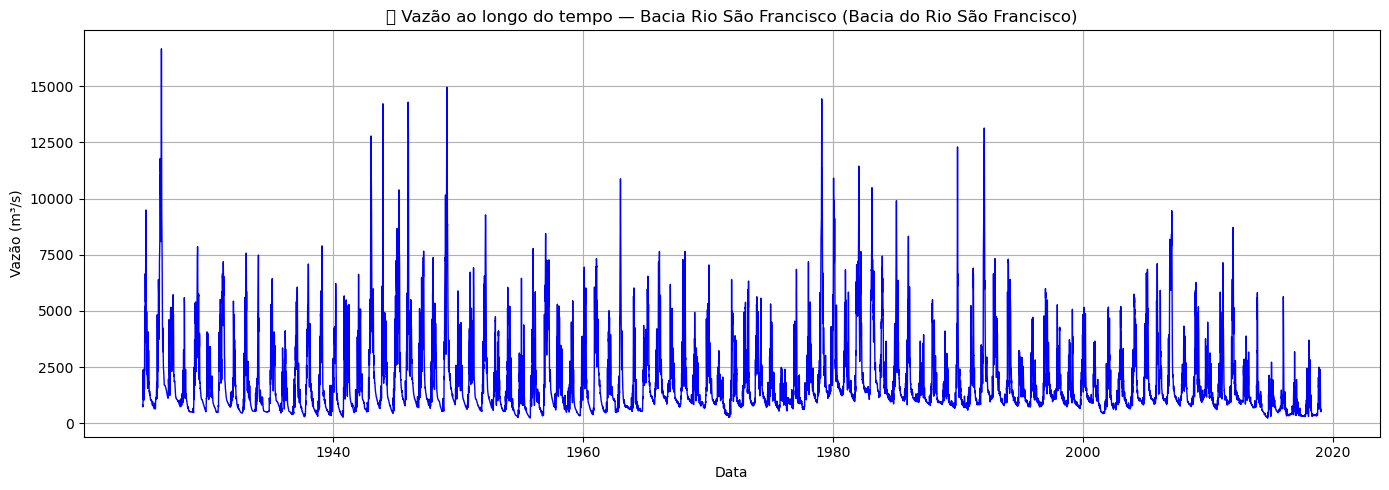

In [73]:
# GRÁFICO DE LINHA

plt.figure(figsize=(14,5))
plt.plot(df_bacia5['date'], df_bacia5['streamflow_m3s'], color='blue', linewidth=1)
plt.title(f'📈 Vazão ao longo do tempo — Bacia {nome} ({regiao})')
plt.xlabel('Data')
plt.ylabel('Vazão (m³/s)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\3036599705.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


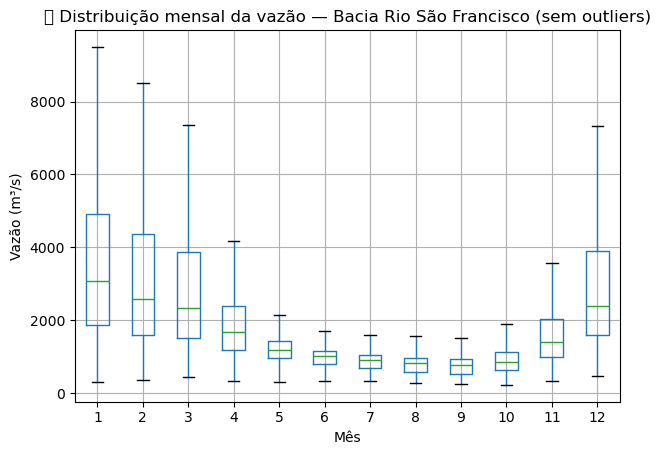

In [77]:
# BOXPLOT (VAZÃO POR MÊS)

plt.figure(figsize=(10,5))

df_bacia5.boxplot(
    column='streamflow_m3s',
    by='month',
    grid=True,
    showfliers=False  # ❌ Oculta os outliers
)

plt.title(f'📦 Distribuição mensal da vazão — Bacia {nome} (sem outliers)')
plt.suptitle('')
plt.xlabel('Mês')
plt.ylabel('Vazão (m³/s)')
plt.tight_layout()
plt.show()



C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\2734400440.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


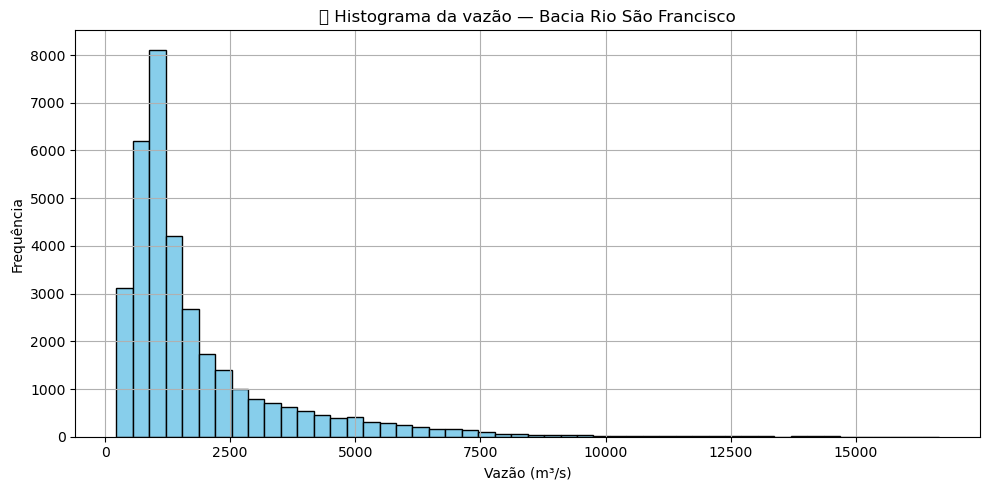

In [78]:
# HISTOGRAMA (FREQUÊNCIA DE VAZÕES)

plt.figure(figsize=(10,5))
plt.hist(df_bacia5['streamflow_m3s'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title(f'📊 Histograma da vazão — Bacia {nome}')
plt.xlabel('Vazão (m³/s)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()



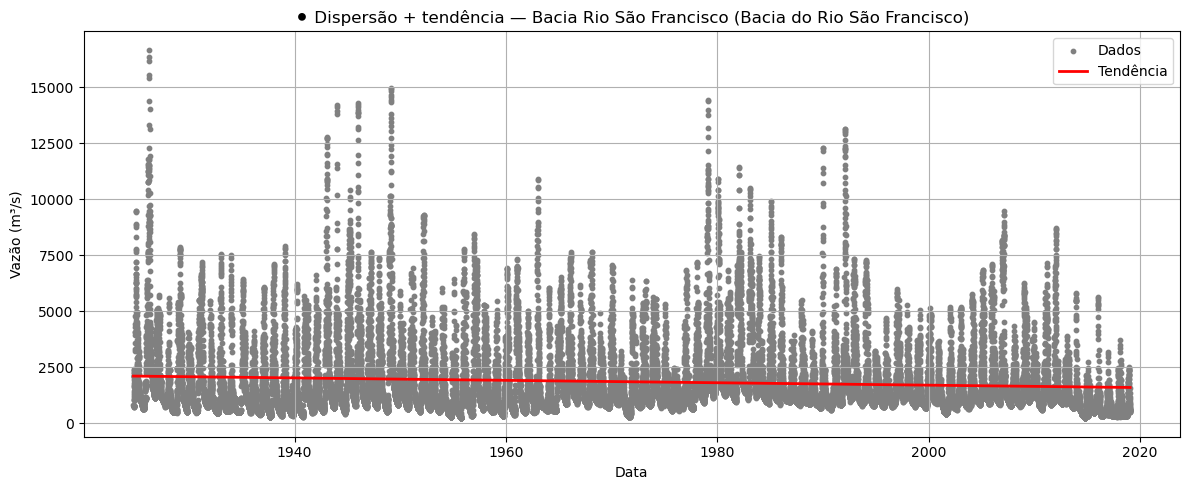

In [76]:
# GRÁFICO DE DISPERSÃO COM LINHA DE TENDÊNCIA

import numpy as np

x = df_bacia5['date'].map(pd.Timestamp.toordinal)
y = df_bacia5['streamflow_m3s']

# Remover NaN para regressão
mask = ~y.isna()
x_clean = x[mask]
y_clean = y[mask]

# Ajuste linear
coef = np.polyfit(x_clean, y_clean, 1)
trend = np.poly1d(coef)

# Plot
plt.figure(figsize=(12,5))
plt.scatter(df_bacia5['date'], y, s=10, color='gray', label='Dados')
plt.plot(df_bacia5['date'], trend(x), color='red', linewidth=2, label='Tendência')

plt.title(f'⚫ Dispersão + tendência — Bacia {nome} ({regiao})')
plt.xlabel('Data')
plt.ylabel('Vazão (m³/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 5️⃣ Gráfico de Decomposição de Séries Temporais

Este gráfico permite separar uma série temporal em **três componentes**:

- **Tendência**: a direção geral dos dados ao longo do tempo (ex: aumento ou redução no nível do rio).
- **Sazonalidade**: variações periódicas recorrentes (ex: chuvas concentradas no verão).
- **Ruído (resíduo)**: variações aleatórias, imprevisíveis.

📌 A decomposição é fundamental para **compreender padrões ocultos**, prever comportamentos futuros e embasar decisões de gestão hídrica na Bacia do Rio São Francisco.


C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\1734978802.py:17: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


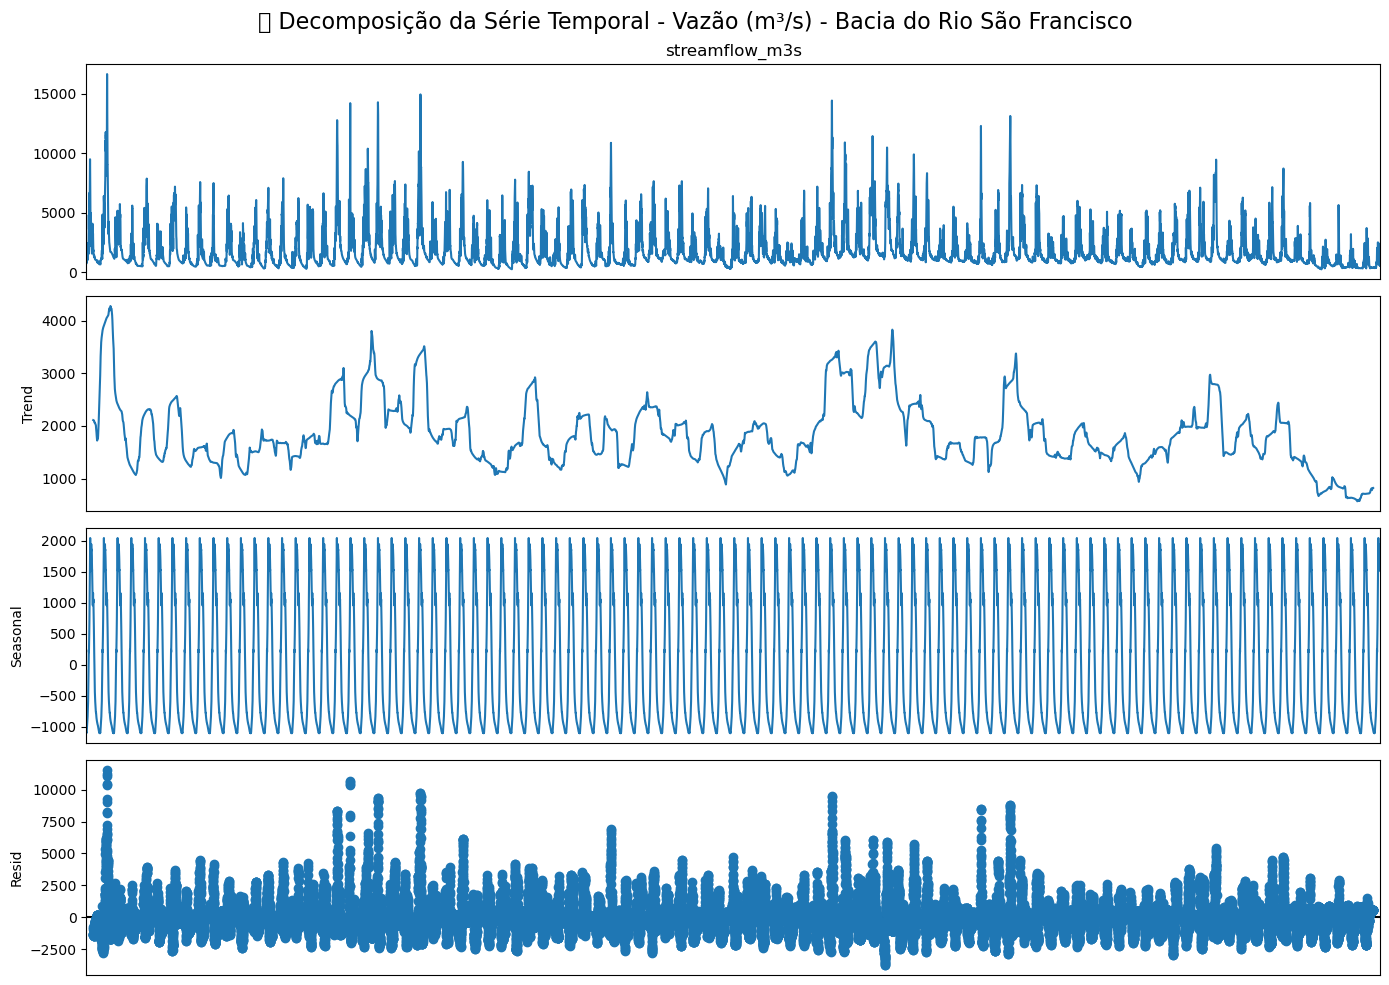

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Garantindo que o índice seja datetime
df_bacia5.index = pd.to_datetime(df_bacia5.index)

# Selecionando a série de vazão (sem valores nulos)
serie = df_bacia5['streamflow_m3s'].dropna()

# Decomposição aditiva com período anual (ajuste se necessário)
decomposicao = seasonal_decompose(serie, model='additive', period=365)

# Plotando os componentes
fig = decomposicao.plot()
fig.set_size_inches(14, 10)
plt.suptitle("📉 Decomposição da Série Temporal - Vazão (m³/s) - Bacia do Rio São Francisco", fontsize=16)
plt.tight_layout()
plt.show()




### 6️⃣ Gráfico de Área

O gráfico de área é uma variação do gráfico de linha onde a área sob a curva é preenchida, proporcionando uma percepção visual mais forte do volume ou intensidade da variável ao longo do tempo.

Neste caso, aplicamos o gráfico de área para a **vazão (m³/s)** ao longo dos anos na Bacia do Rio São Francisco. Isso ajuda a visualizar períodos de maior ou menor fluxo de água de forma mais impactante, destacando variações e tendências que podem indicar eventos hidrológicos importantes, como cheias ou secas.

C:\Users\AUGUSTO\AppData\Local\Temp\ipykernel_4244\2603981214.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AUGUSTO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


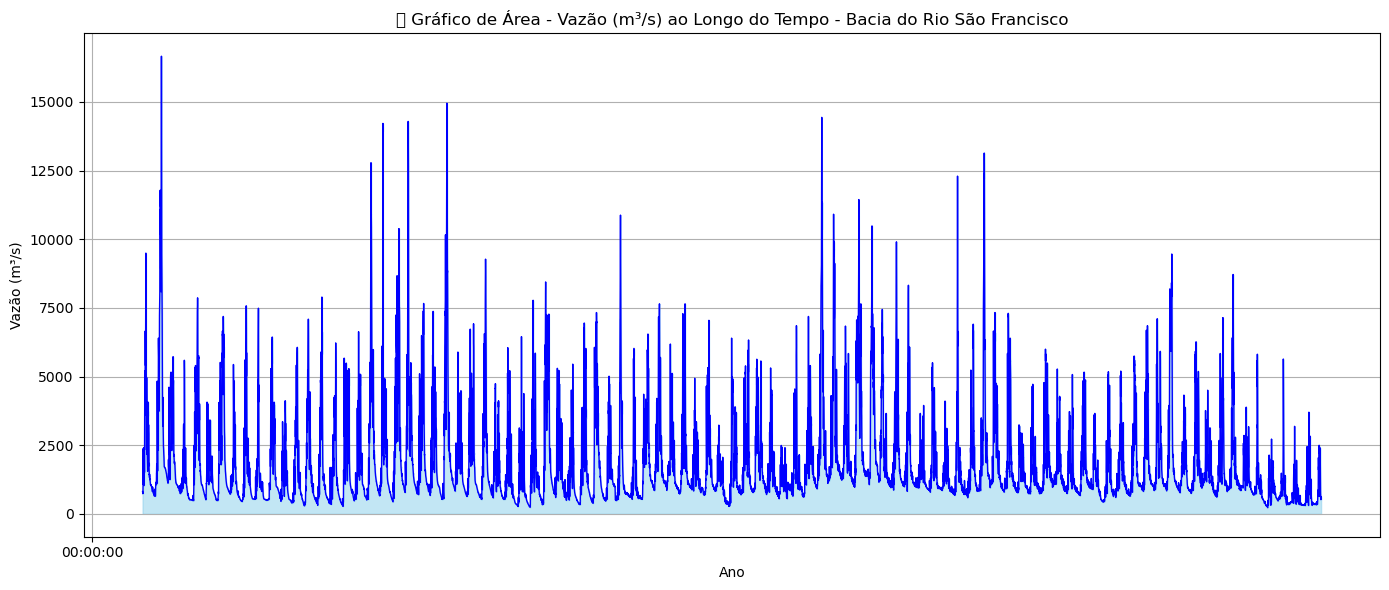

In [82]:
# Garantindo que o índice seja datetime
df_bacia5.index = pd.to_datetime(df_bacia5.index)

# Série de vazão sem valores nulos
serie = df_bacia5['streamflow_m3s'].dropna()

# Gráfico de área
plt.figure(figsize=(14,6))
plt.fill_between(serie.index, serie.values, color='skyblue', alpha=0.5)
plt.plot(serie.index, serie.values, color='blue', linewidth=1)

plt.title('📈 Gráfico de Área - Vazão (m³/s) ao Longo do Tempo - Bacia do Rio São Francisco')
plt.xlabel('Ano')
plt.ylabel('Vazão (m³/s)')
plt.grid(True)
plt.tight_layout()
plt.show()
